In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("datasets/AirQualityUCI.csv",delimiter=";", decimal=",")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.6000,1.5000,2.6000,11.900
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0000,1053.0000,1221.0000,2040.000
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0000,-200.0000,-200.0000,1189.000
C6H6(GT),9357.0,1.865683,41.380206,-200.0,4.0000,7.9000,13.6000,63.700
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0000,895.0000,1105.0000,2214.000
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0000,141.0000,284.0000,1479.000
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0000,794.0000,960.0000,2683.000
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0000,96.0000,133.0000,340.000
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0000,1446.0000,1662.0000,2775.000
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0000,942.0000,1255.0000,2523.000


In [6]:
# essendo presente il valore -200 che è stato messo come valore di default per indicare la presenza di valori vuoti
df[df==-200] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [7]:
# controllando i valori nulli
percent_missing = (df.isnull().sum().sort_values(ascending=False)*100 / len(df))
percent_missing

NMHC(GT)         90.231912
CO(GT)           17.986534
NO2(GT)          17.548360
NOx(GT)          17.516298
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
PT08.S3(NOx)      3.911510
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
Date              0.000000
Time              0.000000
dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),7674.0,2.152750,1.453252,0.1000,1.1000,1.8000,2.9000,11.900
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0000,937.0000,1063.0000,1231.0000,2040.000
NMHC(GT),914.0,218.811816,204.459921,7.0000,67.0000,150.0000,297.0000,1189.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.4000,8.2000,14.0000,63.700
PT08.S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.5000,909.0000,1116.0000,2214.000
NOx(GT),7718.0,246.896735,212.979168,2.0000,98.0000,180.0000,326.0000,1479.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.0000,806.0000,969.5000,2683.000
NO2(GT),7715.0,113.091251,48.370108,2.0000,78.0000,109.0000,142.0000,340.000
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.0000,1463.0000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.5000,963.0000,1273.5000,2523.000


In [10]:
# consideriamo dati di granularità giornaliera
df["Date"] = pd.to_datetime(df["Date"])
df = df.groupby(df["Date"],as_index=False).sum()
df

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-01-04,61.2,26132.0,7443.0,251.4,21219.0,3710.0,18494.0,2225.0,34532.0,24273.0,325.9,1073.8,17.9525
1,2004-01-05,47.3,26340.0,275.0,207.9,21929.0,2409.0,22034.0,1954.0,39370.0,21711.0,483.6,1252.4,28.0155
2,2004-01-06,42.0,27254.0,0.0,297.0,24525.0,3497.0,21523.0,1745.0,45156.0,25607.0,487.8,1587.7,36.8004
3,2004-01-07,51.9,27134.0,0.0,293.4,24925.0,3213.0,17782.0,2609.0,44502.0,25431.0,730.8,952.6,38.9786
4,2004-01-08,23.6,23380.0,0.0,139.4,19022.0,1190.0,21122.0,1346.0,37416.0,16094.0,735.7,1010.9,40.1645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2005-11-02,99.9,4412.0,0.0,42.4,3357.0,13979.0,1532.0,5137.0,3947.0,6131.0,23.9,162.3,1.7392
387,2005-11-03,38.7,26916.0,0.0,238.4,21971.0,9103.0,15436.0,3827.0,27489.0,27988.0,254.4,1029.7,13.3058
388,2005-12-01,75.3,31247.0,0.0,368.0,27259.0,12859.0,13348.0,3426.0,35739.0,34944.0,287.2,1576.5,21.7280
389,2005-12-02,80.7,35541.0,0.0,365.1,27316.0,13416.0,12390.0,4956.0,32853.0,45579.0,199.6,1419.6,15.5582


In [12]:
f'Da {df["Date"].dt.date.min()} a {df["Date"].dt.date.max()}'

'Da 2004-01-04 a 2005-12-03'

In [14]:
import matplotlib.dates as mdates

def plot_ts(df:pd.DataFrame, begin:str, end:str):
    fig, axs = plt.subplots(nrows=df.iloc[:,1:].shape[1],sharex=["all"],figsize=(15,50))
    i = 0
    for col in df.iloc[:,1:].columns:
        sns.barplot(x=df[(df["Date"] >= begin) & (df["Date"] <= end)]["Date"].dt.date,
                    y=df[(df["Date"] >= begin) & (df["Date"] <= end)][col],ax=axs[i])
        axs[i].set_title(col,fontsize=15)
        i += 1

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14)) 
    plt.gca().xaxis.set_tick_params(rotation = 30)  

    plt.tight_layout()

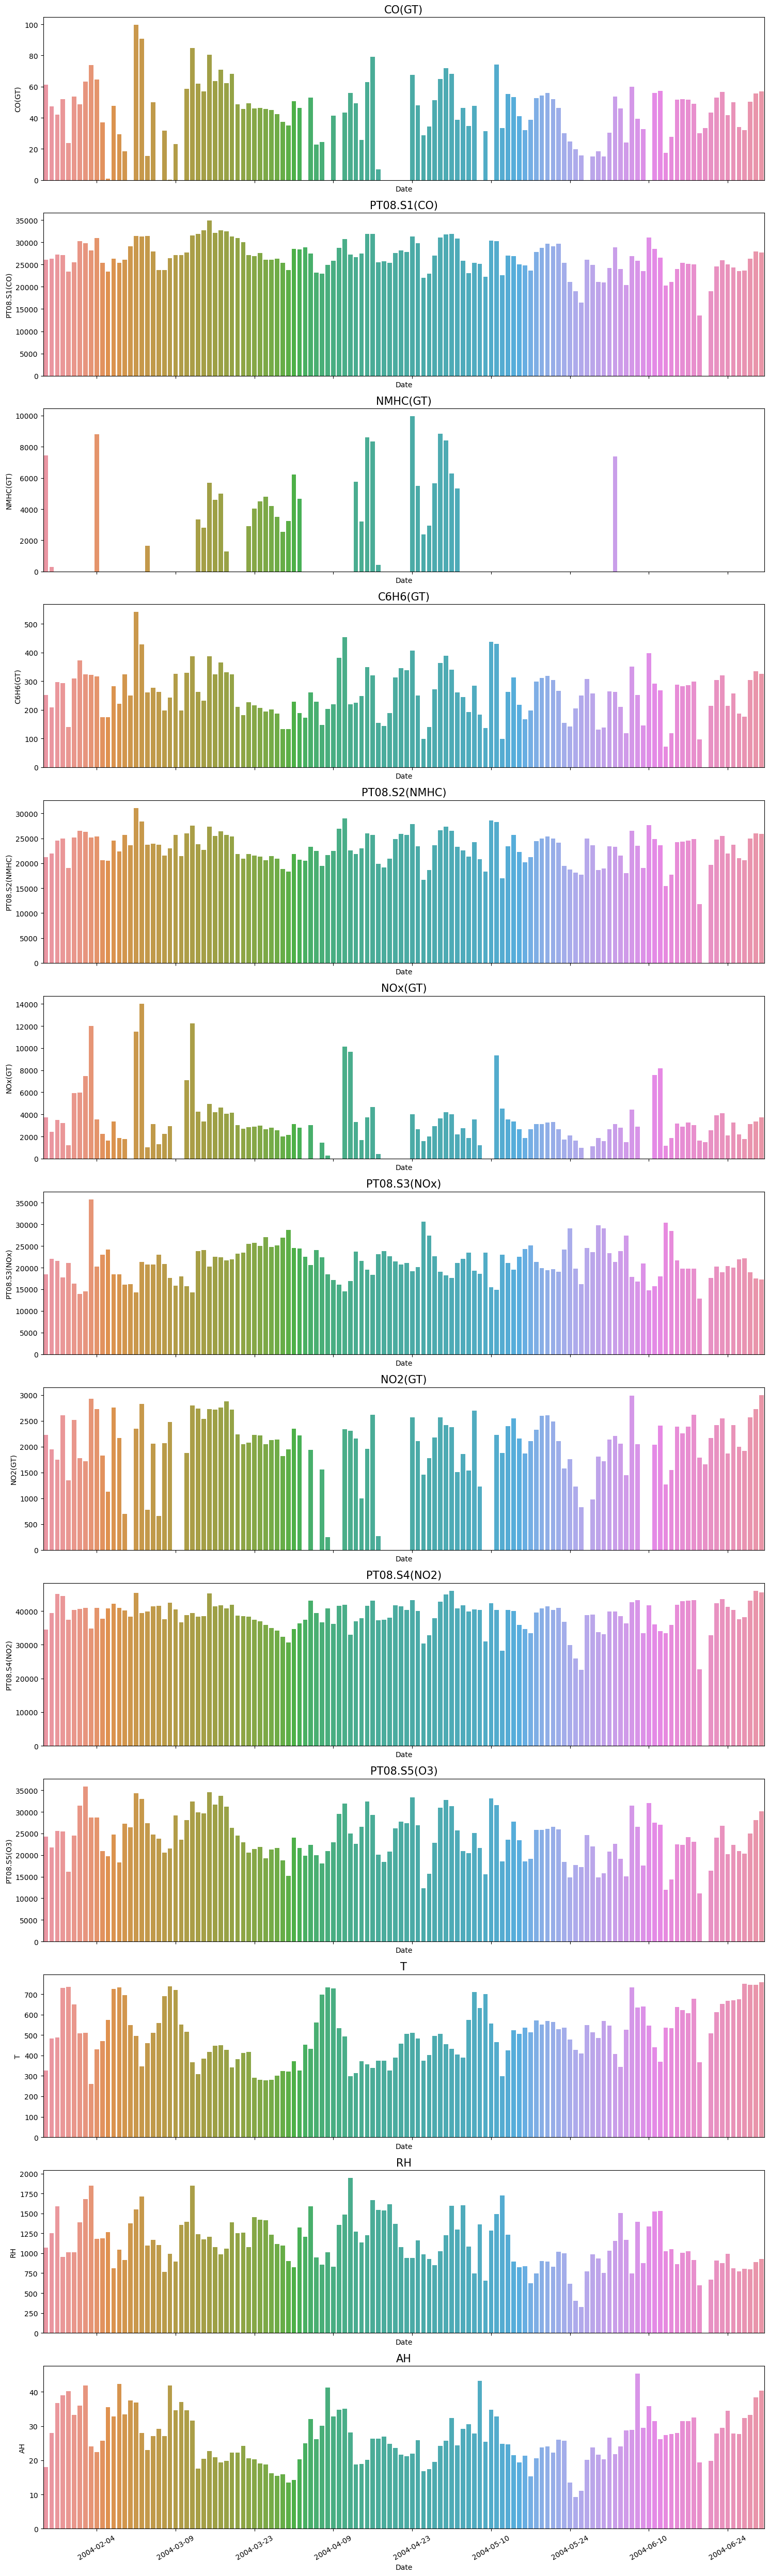

In [15]:
plot_ts(df,'2004-01-01','2004-06-30')

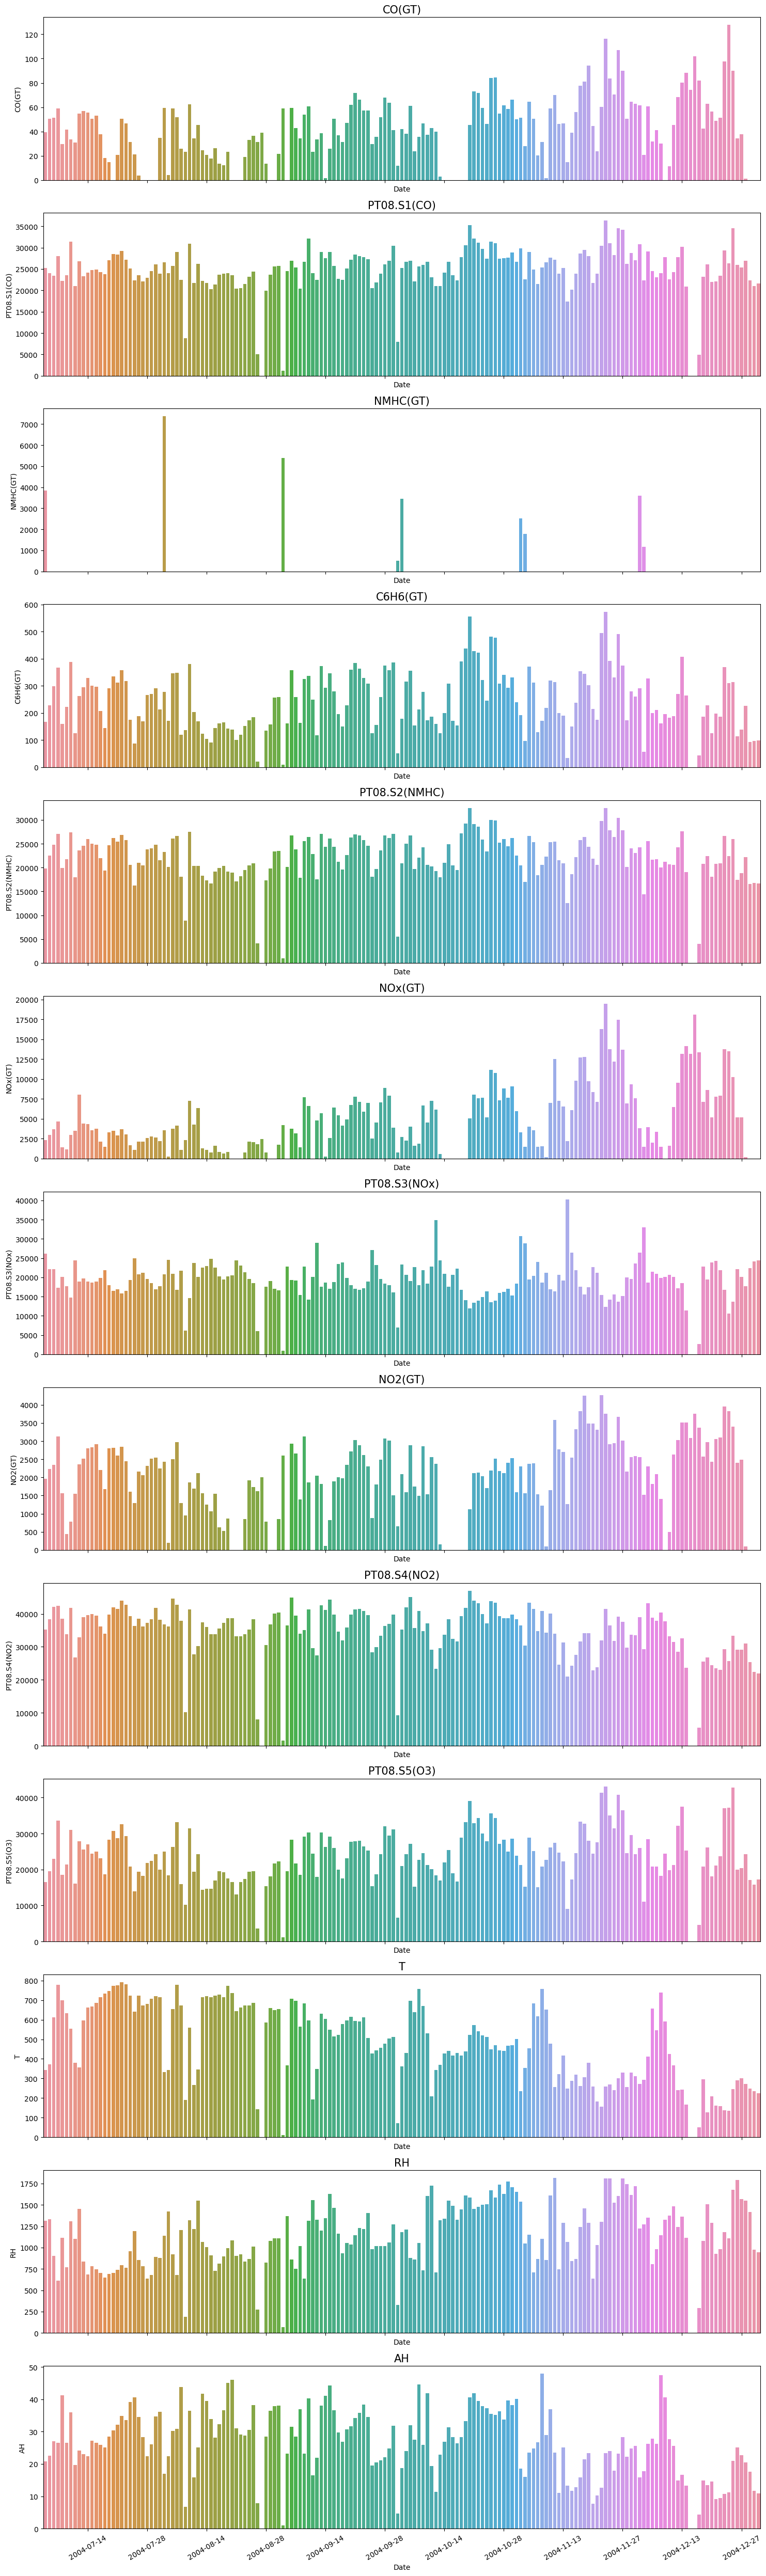

In [16]:
plot_ts(df,'2004-07-01','2004-12-31')

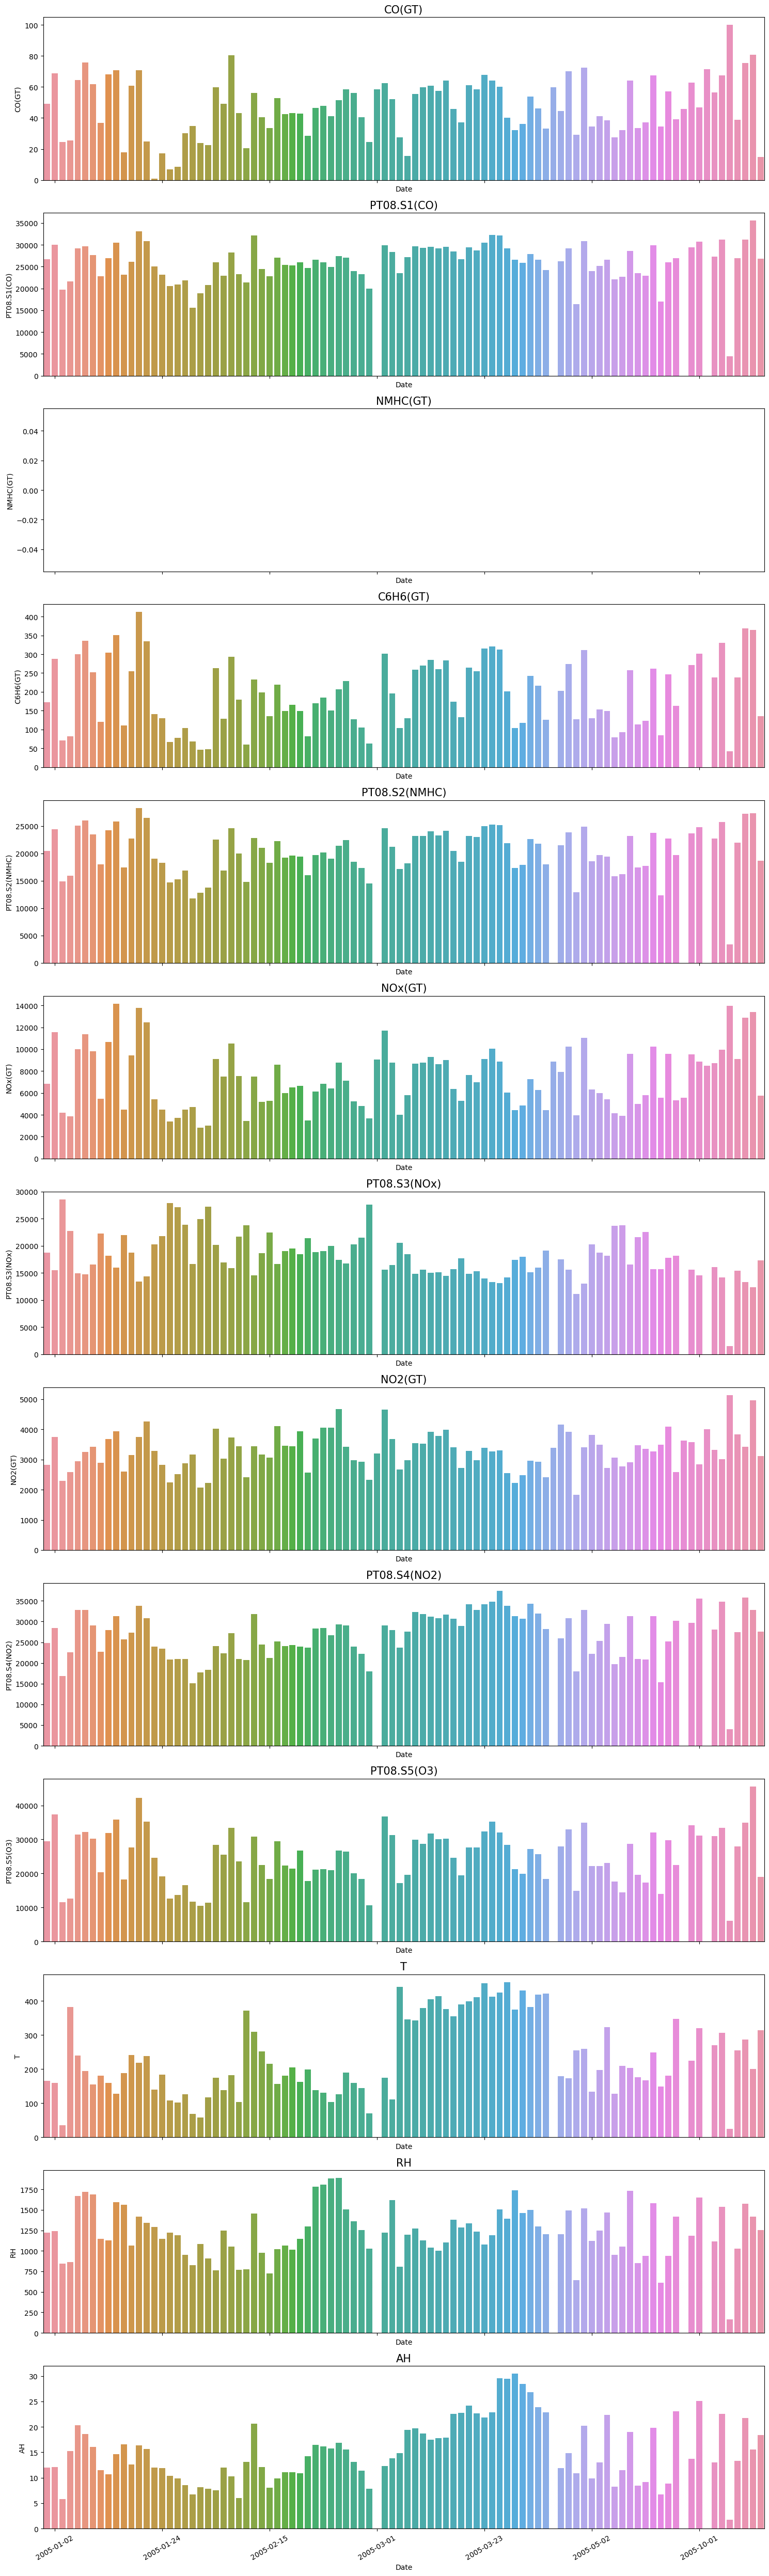

In [17]:
plot_ts(df,'2005-01-01','2005-12-31')

# Data Preparation

## Data Cleaning

In [13]:
#elimina colonne con alta percentuale di dati mancanti
df_new = df.drop(columns=percent_missing[percent_missing >= 17].index.to_list())
df_new.columns

Index(['Date', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [14]:
#inserimento di valore di default media per ogni colonna
for col in df_new.columns[1:]:
    df_new[col].fillna(df_new[col].mean(),inplace=True)
df_new.isnull().sum().sort_values(ascending=False)

Date             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Data Construction

(9357, 10)